<a href="https://colab.research.google.com/github/junheeyoon/alps/blob/master/infare_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# 현재 경로 확인
import os
print(os.path.abspath(os.curdir))

# Root 경로 설정
import os
os.chdir('/content/drive/MyDrive/데이터분석')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content


In [ ]:
import os

count = 0
for (path, dir, files) in os.walk("./alps/data/alps"):
    for filename in files:
        ext = os.path.splitext(filename)[-1]
        if ext == '.zip':
            
            #print(filename.replace('zip','csv'))
            #count += 1
            #print("%s/%s" % (path, filename))
            new_text = filename.split('_')[1] + '_'+ filename.split('_')[2]
            all_path = path + '/' + filename
            print(new_text)
            if os.path.exists('./alps/data/' + new_text.replace('zip','csv')):
                count += 1
            else:
                #count += 1
                #print(new_text)
                #print('./alps/data/' + new_text.replace('zip','csv'))
                import zipfile
                print(all_path)
                if all_path == './alps/data/alps/20190805181554_OZ_310720191000.zip':
                    continue
                #fantasy_zip = zipfile.ZipFile(all_path)
                #fantasy_zip.extractall('./alps/data/')
            
                #fantasy_zip.close()
print(count)

In [5]:
import pandas as pd
path_to_data = './alps/data/OZ_280820191500.csv'

df = pd.read_csv(path_to_data, encoding='cp949')

# DataFrame type 확인
df.head()

#df.describe()

,id,observation_date,observation_time,pos,origin,destination,is_one_way,outbound_travel_stop_over,inbound_travel_stop_over,carrier,outbound_flight_no,inbound_flight_no,outbound_departure_date,outbound_departure_time,outbound_arrival_date,outbound_arrival_time,inbound_departure_date,inbound_departure_time,inbound_arrival_date,inbound_arrival_time,outbound_fare_basis,inbound_fare_basis,outbound_booking_class,inbound_booking_class,price_exc,price_inc,tax,currency,source,price_outbound,price_inbound,is_tax_inc_outin,search_class,outbound_fare_family,inbound_fare_family,outbound_seats,inbound_seats,min_stay,outbound_flight_duration,inbound_flight_duration
0,1404956139591,2019-08-28,13:59,US,LAX,CEB,0,HKG,MNL,CX,"CX883,CX921","PR2868,PR112",2020-01-15,22:25,2020-01-17,11:10,2020-02-05,23:45,2020-02-06,09:15,QLXSPCL,ELOXTUS,"Q,Q","E,E",NaN,1382.63,NaN,USD,Expedia (USA),NaN,NaN,1,E,NaN,NaN,"9,9","9,9",21,1245,1530
1,1404956139592,2019-08-28,13:59,US,LAX,CEB,0,HKG,MNL,CX,"CX883,CX921","PR2868,PR102",2020-01-15,22:25,2020-01-17,11:10,2020-02-05,23:45,2020-02-06,19:30,QLXSPCL,ELOXTUS,"Q,Q","E,E",NaN,1382.63,NaN,USD,Expedia (USA),NaN,NaN,1,E,NaN,NaN,"9,9","9,9",21,1245,2145
2,1404956139593,2019-08-28,13:59,US,LAX,CEB,0,HKG,"CRK,DXB",CX,"CX883,CX921","EK338,EK338,EK215",2020-01-15,22:25,2020-01-17,11:10,2020-02-05,17:05,2020-02-06,12:45,QLXSPCL,USSOSPH1,"Q,Q","U,U,U",NaN,2100.93,NaN,USD,Expedia (USA),NaN,NaN,1,E,NaN,NaN,"9,9","9,9,9",21,1245,2140
3,1404956139594,2019-08-28,13:59,US,LAX,CEB,0,HKG,HKG,CX,"CX883,CX921","CX922,CX7686",2020-01-15,22:25,2020-01-17,11:10,2020-02-05,12:20,2020-02-05,16:50,QLXSPCL,LAAROPH8,"Q,Q","L,L",NaN,1644.54,NaN,USD,Expedia (USA),NaN,NaN,1,E,NaN,NaN,"9,9","9,9",21,1245,1230
4,1404956142574,2019-08-28,13:59,US,LAX,CEB,0,HKG,MNL,CX,"CX883,CX921","PR2860,PR102",2020-01-15,22:25,2020-01-17,11:10,2020-02-05,17:15,2020-02-05,19:30,QLXSPCL,ELOXTUS,"Q,Q","E,E",NaN,1382.63,NaN,USD,Expedia (USA),NaN,NaN,1,E,NaN,NaN,"9,9","9,9",21,1245,1095


In [3]:
import pandas as pd
import glob
import os

input_file = './alps/data'
output_file = './alps/data/result.csv'
allFile_list = glob.glob(os.path.join(input_file,'OZ_280820192*'))
print(allFile_list)

allData = []

for file in allFile_list:
    
    df = pd.read_csv(file)
    allData.append(df)


['./alps/data/OZ_280820192359PD.csv', './alps/data/OZ_280820192200.csv', './alps/data/OZ_280820192100.csv', './alps/data/OZ_280820192300.csv', './alps/data/OZ_280820192000.csv']


In [36]:
df_all = pd.concat(allData, ignore_index=True)
df_all

,id,observation_date,observation_time,pos,origin,destination,is_one_way,outbound_travel_stop_over,inbound_travel_stop_over,carrier,outbound_flight_no,inbound_flight_no,outbound_departure_date,outbound_departure_time,outbound_arrival_date,outbound_arrival_time,inbound_departure_date,inbound_departure_time,inbound_arrival_date,inbound_arrival_time,outbound_fare_basis,inbound_fare_basis,outbound_booking_class,inbound_booking_class,price_exc,price_inc,tax,currency,source,price_outbound,price_inbound,is_tax_inc_outin,search_class,outbound_fare_family,inbound_fare_family,outbound_seats,inbound_seats,min_stay,outbound_flight_duration,inbound_flight_duration
0,1405531608081,2019-08-28,23:07,US,LAX,KIX,0,PEK,PEK,CA,"CA888,CA161","CA928,CA987",2019-10-04,11:30,2019-10-05,20:30,2019-10-18,13:50,2019-10-19,12:00,484CA,484CA,NaN,NaN,484.0,611.43,127.43,USD,Cheapoair (USA),NaN,NaN,1,E,"COACH,COACH","COACH,COACH",NaN,NaN,14,1020,2290
1,1405532252110,2019-08-28,23:07,US,LAX,NRT,0,SFO,NaN,UA,"UA283,UA837",UA7928,2019-12-08,19:45,2019-12-10,15:30,2019-12-29,16:00,2019-12-29,08:40,917UA,917UA,NaN,NaN,917.0,1031.18,114.18,USD,Cheapoair (USA),NaN,NaN,1,E,"COACH,COACH",COACH,NaN,NaN,21,1605,580
2,1405531925791,2019-08-28,23:07,US,ORD,HAN,0,ICN,TPE,KE,"KE38,KE5689","BR386,BR56",2020-02-22,11:30,2020-02-23,21:00,2020-03-07,18:20,2020-03-08,20:45,1259MIX,1259MIX,NaN,NaN,1259.8,1359.06,99.26,USD,Cheapoair (USA),NaN,NaN,1,E,"COACH,COACH","COACH,COACH",NaN,NaN,14,1230,2305
3,1405531751773,2019-08-28,23:07,US,JFK,HKG,0,PVG,PVG,MU,"MU298,MU501","MU702,MU297",2020-01-23,00:45,2020-01-24,11:30,2020-02-06,13:40,2020-02-06,22:00,550MU,550MU,NaN,NaN,550.0,672.43,122.43,USD,Cheapoair (USA),NaN,NaN,1,E,"COACH,COACH","COACH,COACH",NaN,NaN,14,1305,1280
4,1405533023241,2019-08-28,23:07,US,SEA,PEK,0,SFO,SFO,UA,"UA2440,UA888","UA889,UA759",2020-02-20,17:30,2020-02-22,15:30,2020-03-12,17:25,2020-03-13,15:00,485UA,485UA,NaN,NaN,485.0,586.64,101.64,USD,Cheapoair (USA),NaN,NaN,1,E,"COACH,COACH","COACH,COACH",NaN,NaN,21,1800,2195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352004,1405414872100,2019-08-28,19:33,US,AUS,ICN,0,DTW,LAX,DL,"DL2101,DL159","KE11,AA1014",2020-02-05,07:25,2020-02-06,16:30,2020-02-19,19:40,2020-02-19,20:45,TLG0ZRMA,ELX00KYK,"T,T","E,N",NaN,1849.33,NaN,USD,Expedia (USA),NaN,NaN,1,E,NaN,NaN,"9,9","9,9",14,1085,965
352005,1405414872101,2019-08-28,19:33,US,AUS,ICN,0,DTW,"HKG,DFW",DL,"DL2101,DL159","KE613,AA126,AA2594",2020-02-05,07:25,2020-02-06,16:30,2020-02-19,10:40,2020-02-19,18:47,TLG0ZRMA,SLX00YN3,"T,T","T,S,S",NaN,1620.30,NaN,USD,Expedia (USA),NaN,NaN,1,E,NaN,NaN,"9,9","9,9,9",14,1085,1387
352006,1405414872102,2019-08-28,19:33,US,AUS,ICN,0,DTW,"SEA,ATL",DL,"DL2101,DL159","DL9010,DL2922,DL1995",2020-02-05,07:25,2020-02-06,16:30,2020-02-19,15:50,2020-02-19,21:05,TLG0ZRMA,QLX00KYK,"T,T","Q,Q,Q",NaN,1853.83,NaN,USD,Expedia (USA),NaN,NaN,1,E,NaN,NaN,"9,9","9,9,9",14,1085,1215
352007,1405414872103,2019-08-28,19:33,US,AUS,ICN,0,DTW,"SEA,ATL",DL,"DL2101,DL159","DL9010,DL436,DL1837",2020-02-05,07:25,2020-02-06,16:30,2020-02-19,15:50,2020-02-20,00:06,TLG0ZRMA,QLX00KYK,"T,T","Q,Q,Q",NaN,1853.83,NaN,USD,Expedia (USA),NaN,NaN,1,E,NaN,NaN,"9,9","9,9,9",14,1085,1396


In [5]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352009 entries, 0 to 352008
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         352009 non-null  int64  
 1   observation_date           352009 non-null  object 
 2   observation_time           352009 non-null  object 
 3   pos                        352009 non-null  object 
 4   origin                     352009 non-null  object 
 5   destination                352009 non-null  object 
 6   is_one_way                 352009 non-null  int64  
 7   outbound_travel_stop_over  342491 non-null  object 
 8   inbound_travel_stop_over   343850 non-null  object 
 9   carrier                    352009 non-null  object 
 10  outbound_flight_no         352009 non-null  object 
 11  inbound_flight_no          352009 non-null  object 
 12  outbound_departure_date    352009 non-null  object 
 13  outbound_departure_time    35

In [6]:
df_all.isna().sum()

id                                0
observation_date                  0
observation_time                  0
pos                               0
origin                            0
destination                       0
is_one_way                        0
outbound_travel_stop_over      9518
inbound_travel_stop_over       8159
carrier                           0
outbound_flight_no                0
inbound_flight_no                 0
outbound_departure_date           0
outbound_departure_time           0
outbound_arrival_date             0
outbound_arrival_time             0
inbound_departure_date            0
inbound_departure_time            0
inbound_arrival_date              0
inbound_arrival_time              0
outbound_fare_basis               0
inbound_fare_basis                0
outbound_booking_class       155947
inbound_booking_class        155949
price_exc                    185955
price_inc                         0
tax                          185955
currency                    

In [7]:
df_all[['price_inc', 'price_exc', 'price_outbound', 'price_inbound', 'tax', 'origin', 'destination']]

,price_inc,price_exc,price_outbound,price_inbound,tax,origin,destination
0,611.43,484.0,NaN,NaN,127.43,LAX,KIX
1,1031.18,917.0,NaN,NaN,114.18,LAX,NRT
2,1359.06,1259.8,NaN,NaN,99.26,ORD,HAN
3,672.43,550.0,NaN,NaN,122.43,JFK,HKG
4,586.64,485.0,NaN,NaN,101.64,SEA,PEK
...,...,...,...,...,...,...,...
352004,1849.33,NaN,NaN,NaN,NaN,AUS,ICN
352005,1620.30,NaN,NaN,NaN,NaN,AUS,ICN
352006,1853.83,NaN,NaN,NaN,NaN,AUS,ICN
352007,1853.83,NaN,NaN,NaN,NaN,AUS,ICN


In [8]:
df_all['price_inc'].describe()

count    3.520090e+05
mean     4.685896e+05
std      8.529900e+05
min      3.873600e+02
25%      1.683770e+03
50%      2.201030e+03
75%      1.473600e+04
max      8.618300e+06
Name: price_inc, dtype: float64

In [37]:
from sklearn import preprocessing as pc

df_all[['price_inc_minmax']] = pc.MinMaxScaler((0,10)).fit_transform(df_all[['price_inc']])

In [38]:
df_all[['price_inc_minmax']].describe()

,price_inc_minmax
count,352009.000000
mean,0.543290
std,0.989787
min,0.000000
25%,0.001504
50%,0.002105
75%,0.016650
max,10.000000


In [39]:
df_all["orgin_destination"] = df_all["origin"] + " "+ df_all["destination"]

In [12]:
df_all[['orgin_destination', 'outbound_travel_stop_over','outbound_departure_date', 'outbound_departure_time', 'outbound_arrival_date', 'outbound_arrival_time','price_inc']]

,orgin_destination,outbound_travel_stop_over,outbound_departure_date,outbound_departure_time,outbound_arrival_date,outbound_arrival_time,price_inc
0,LAX KIX,PEK,2019-10-04,11:30,2019-10-05,20:30,611.43
1,LAX NRT,SFO,2019-12-08,19:45,2019-12-10,15:30,1031.18
2,ORD HAN,ICN,2020-02-22,11:30,2020-02-23,21:00,1359.06
3,JFK HKG,PVG,2020-01-23,00:45,2020-01-24,11:30,672.43
4,SEA PEK,SFO,2020-02-20,17:30,2020-02-22,15:30,586.64
...,...,...,...,...,...,...,...
352004,AUS ICN,DTW,2020-02-05,07:25,2020-02-06,16:30,1849.33
352005,AUS ICN,DTW,2020-02-05,07:25,2020-02-06,16:30,1620.30
352006,AUS ICN,DTW,2020-02-05,07:25,2020-02-06,16:30,1853.83
352007,AUS ICN,DTW,2020-02-05,07:25,2020-02-06,16:30,1853.83


In [14]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_row', 100)

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

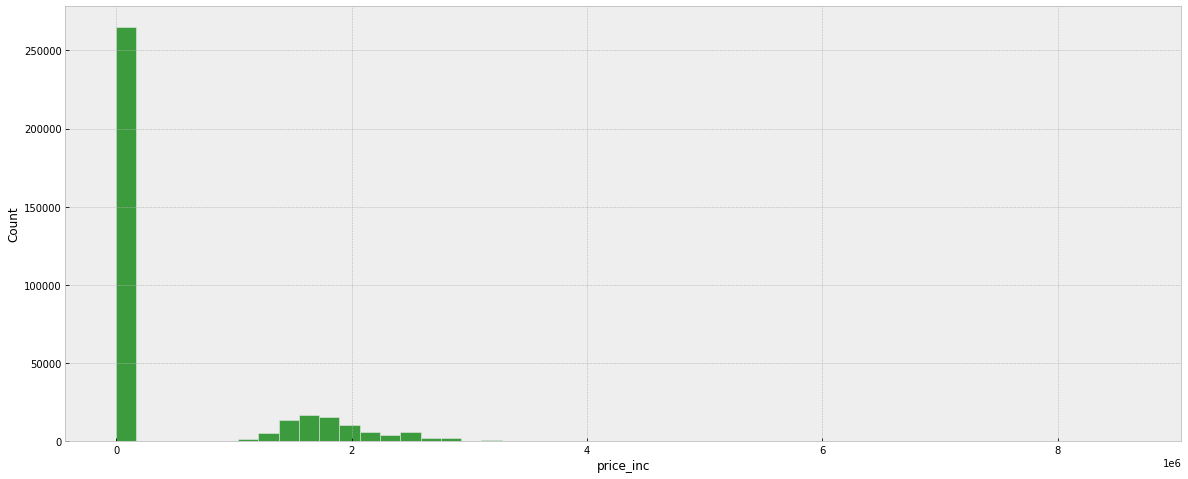

In [26]:
plt.figure(figsize=(20, 8))
sns.histplot(df_all['price_inc'], color='g', bins=50);

# basic scatterplot
sns.lmplot( x="sepal_length", y="sepal_width", data=df, fit_reg=False)
 
# control x and y limits
sns.plt.ylim(0, 20)
sns.plt.xlim(0, None)


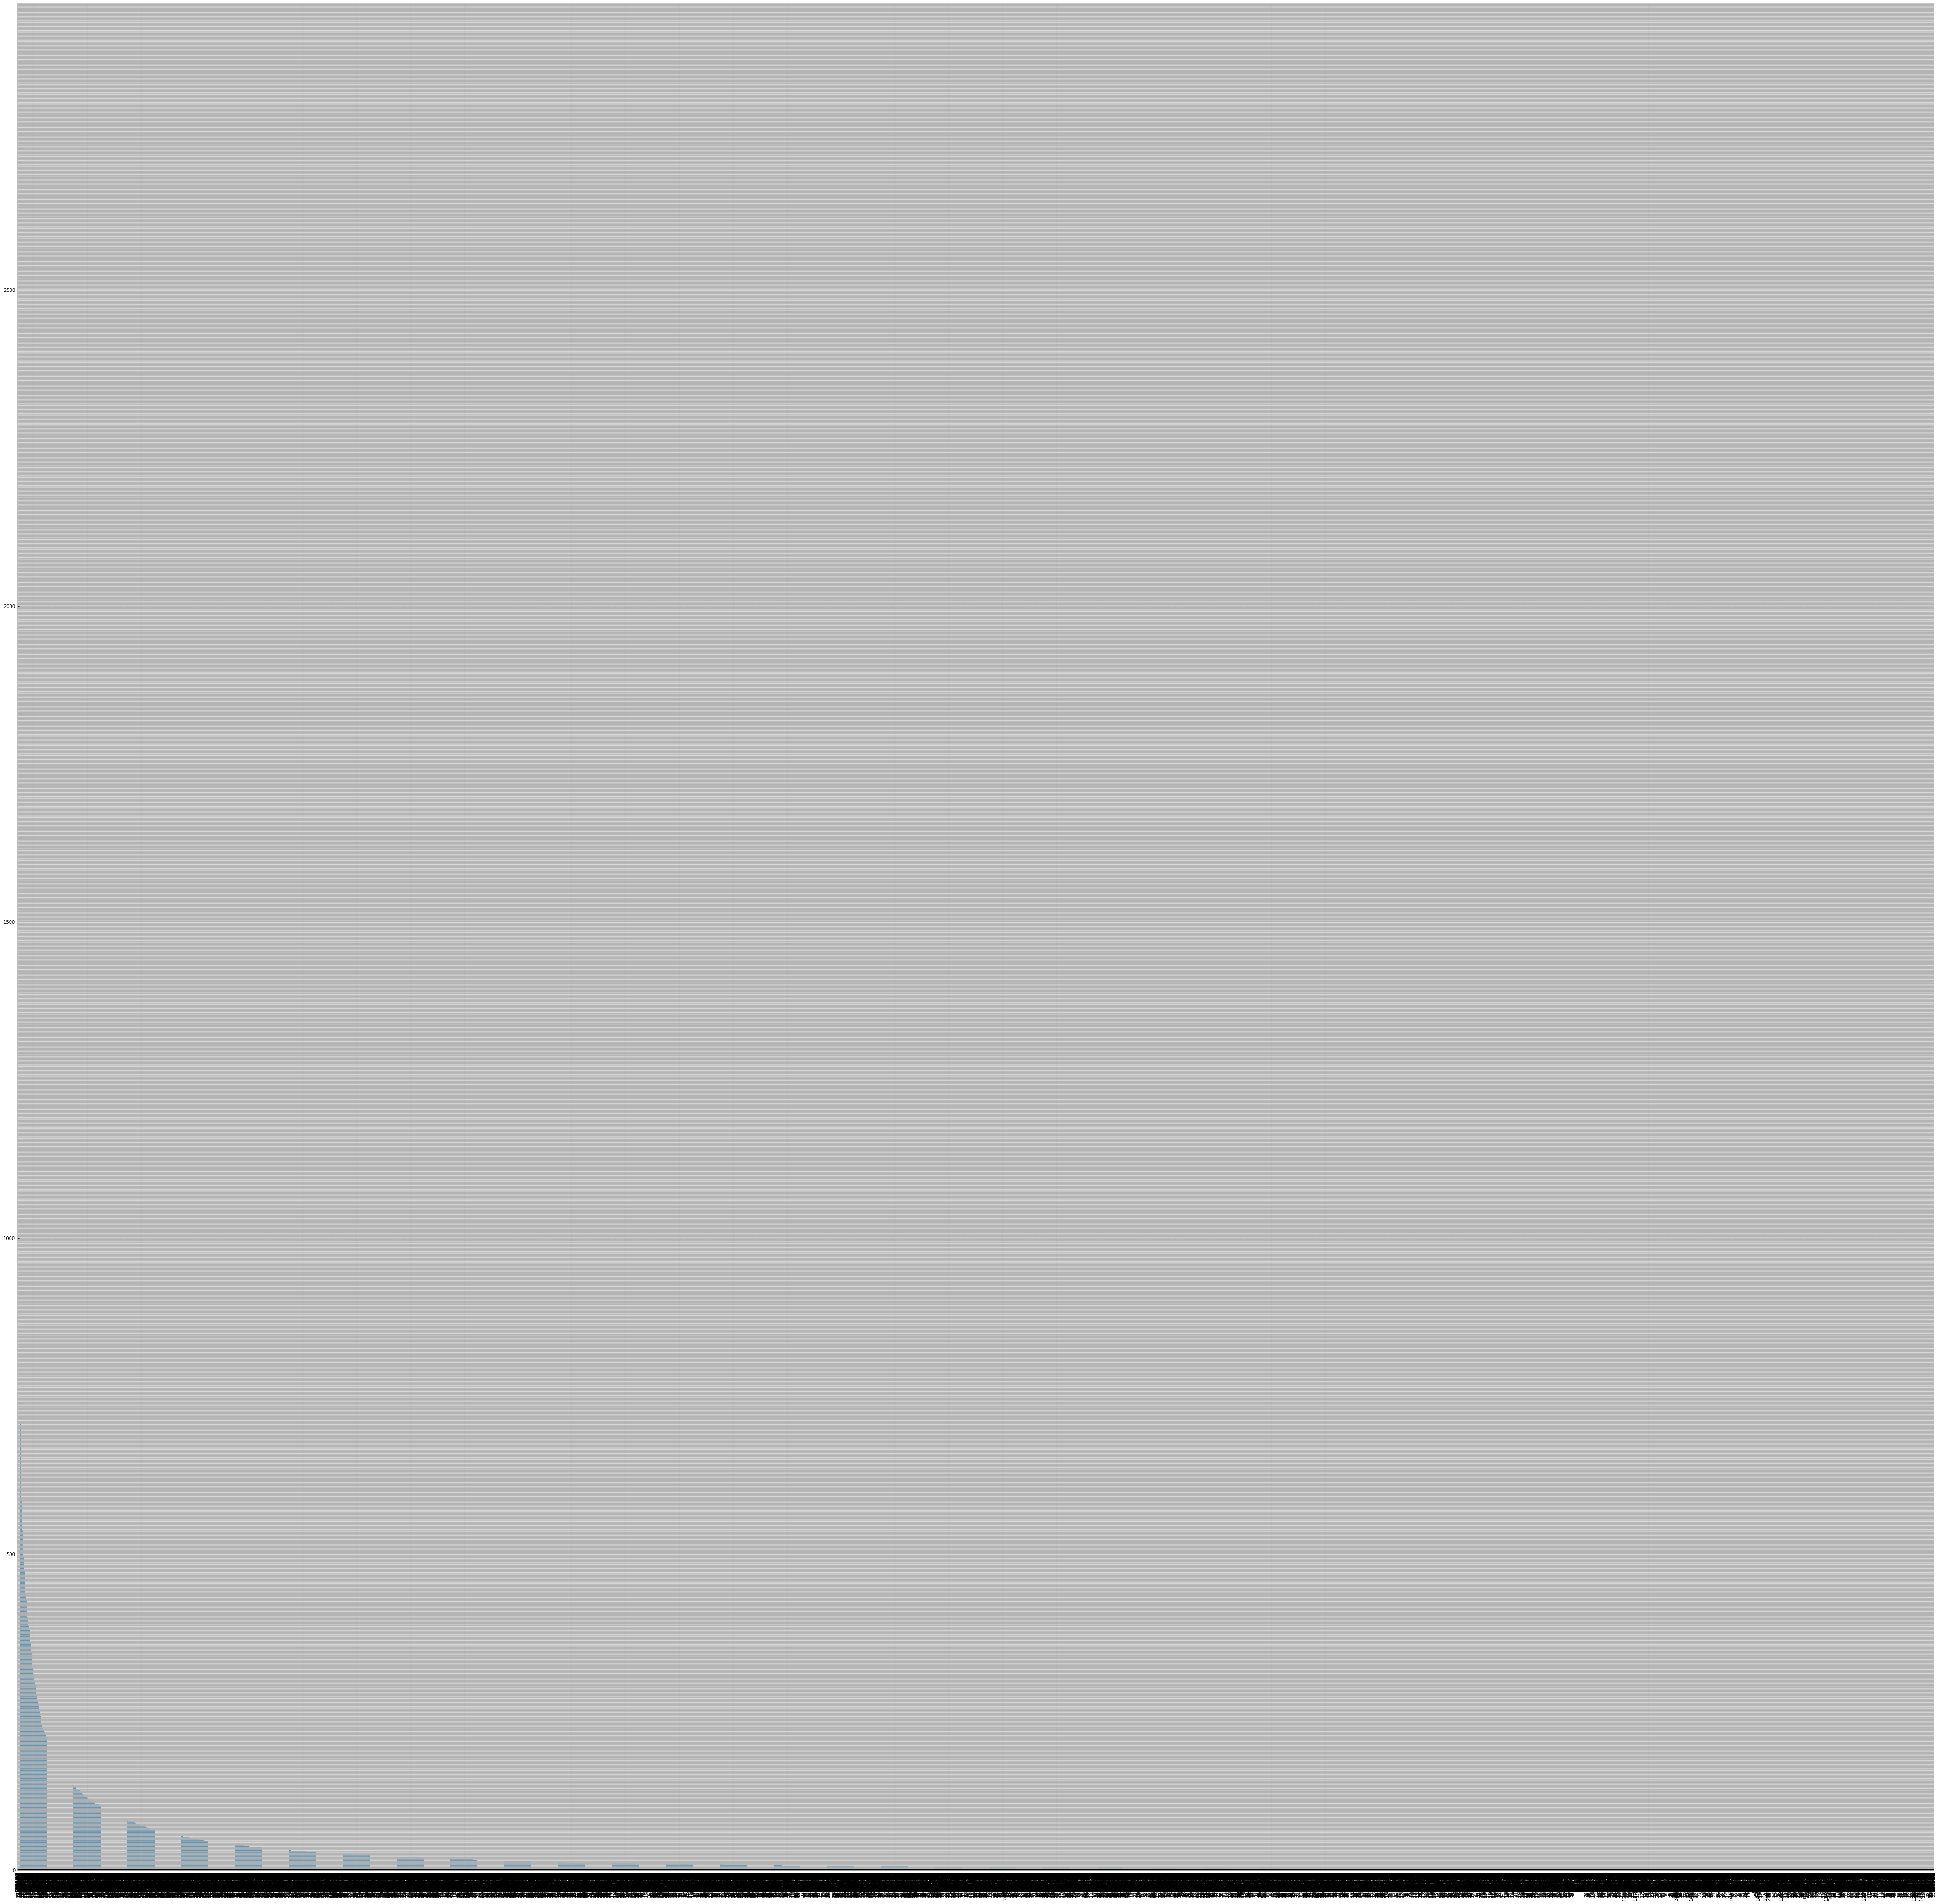

In [51]:
df_all["price_inc"].value_counts().plot(kind='bar') 

In [49]:
#Age NaN 값 제거
import numpy as np
price_remove_nan = np.array(df_all['price_inc'])
import scipy.stats as ss

#zscore 값 출력
price_zscore = ss.zscore(price_remove_nan)
price_zscore

#np_array -> DataFrame 변환(표)
df_zscore = pd.DataFrame(price_zscore, columns=['PriceZscore'])
df_zscore

,PriceZscore
0,-0.548633
1,-0.548141
2,-0.547757
3,-0.548562
4,-0.548663
...,...
352004,-0.547182
352005,-0.547451
352006,-0.547177
352007,-0.547177


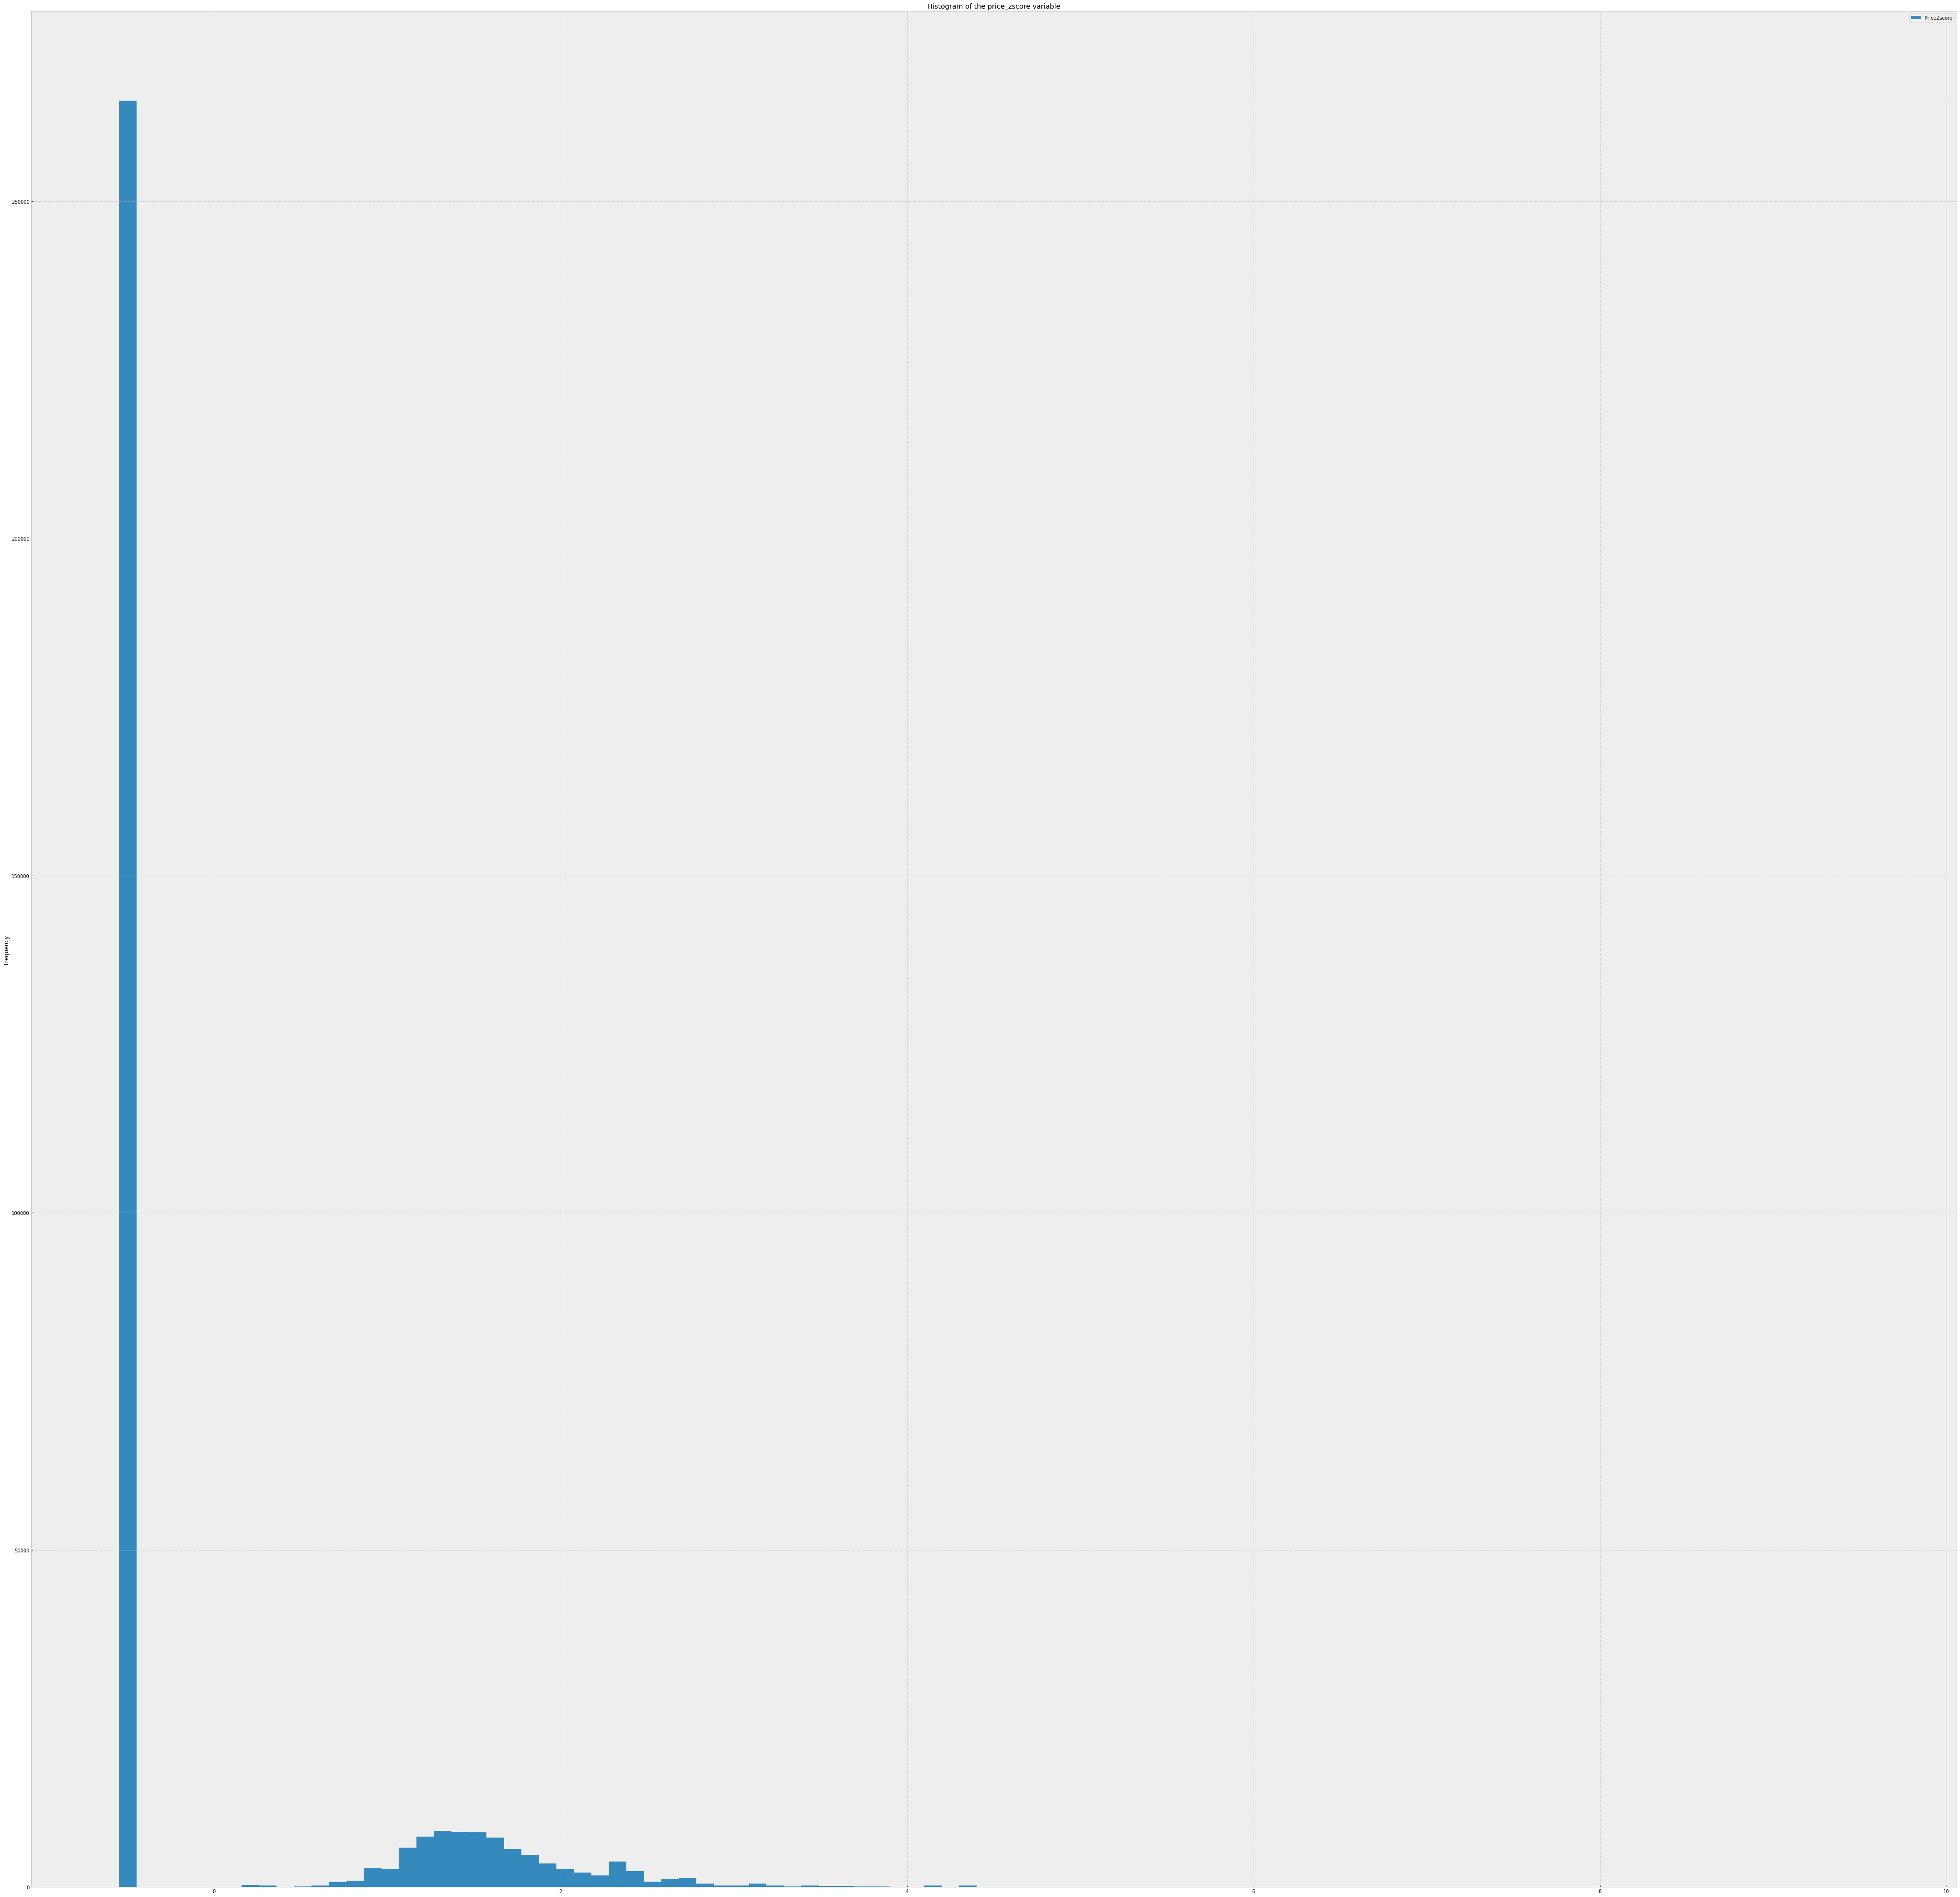

In [50]:
#plot 형식으로 출력
df_zscore.plot.hist(
  bins = 100,
  title = "Histogram of the price_zscore variable"
)

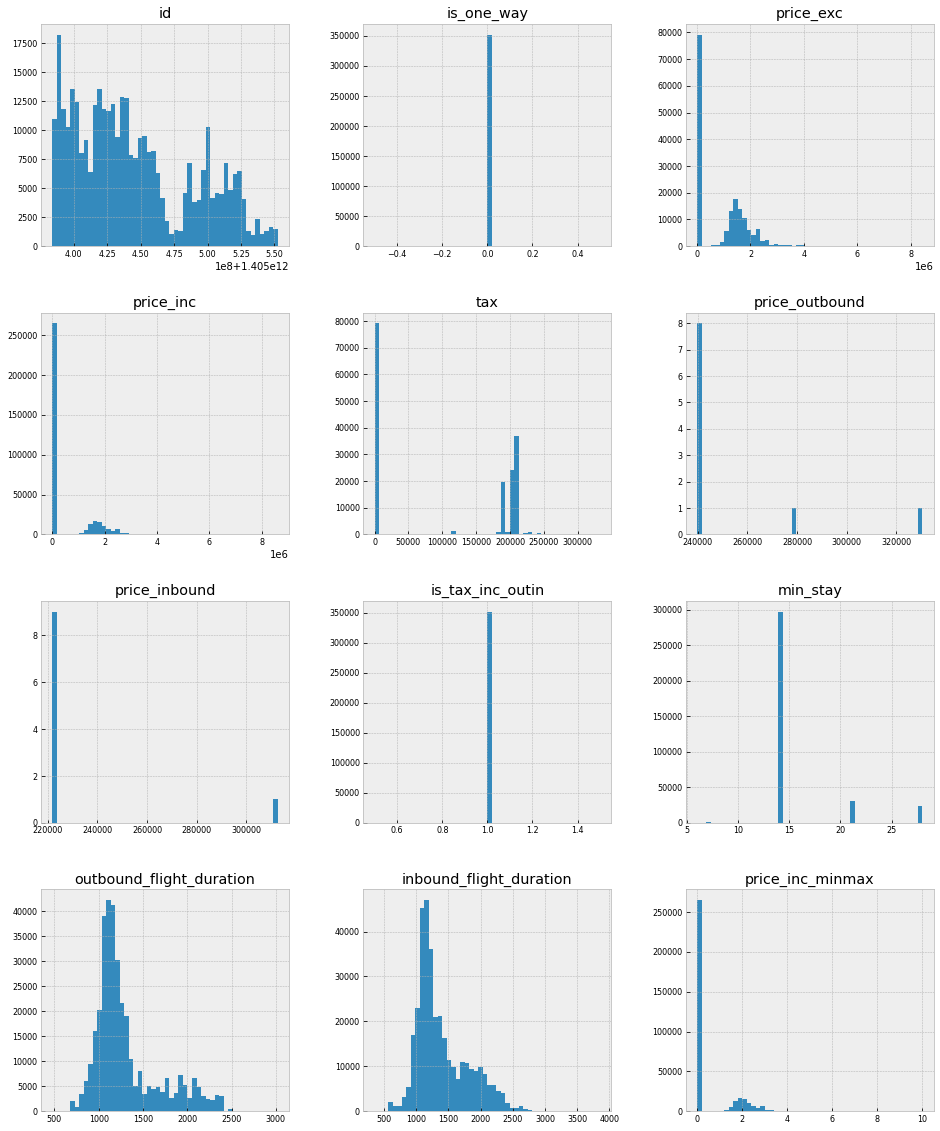

In [17]:
df_num = df_all.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [19]:
category_feature = [ col for col in df_all.columns if df_all[col].dtypes == "object"]
category_feature

['observation_date',
 'observation_time',
 'pos',
 'origin',
 'destination',
 'outbound_travel_stop_over',
 'inbound_travel_stop_over',
 'carrier',
 'outbound_flight_no',
 'inbound_flight_no',
 'outbound_departure_date',
 'outbound_departure_time',
 'outbound_arrival_date',
 'outbound_arrival_time',
 'inbound_departure_date',
 'inbound_departure_time',
 'inbound_arrival_date',
 'inbound_arrival_time',
 'outbound_fare_basis',
 'inbound_fare_basis',
 'outbound_booking_class',
 'inbound_booking_class',
 'currency',
 'source',
 'search_class',
 'outbound_fare_family',
 'inbound_fare_family',
 'outbound_seats',
 'inbound_seats',
 'orgin_destination']

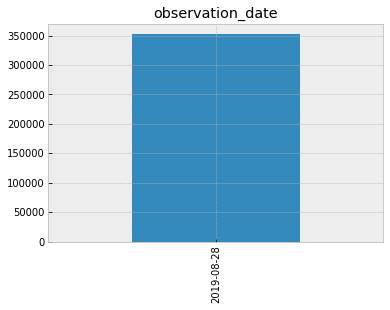

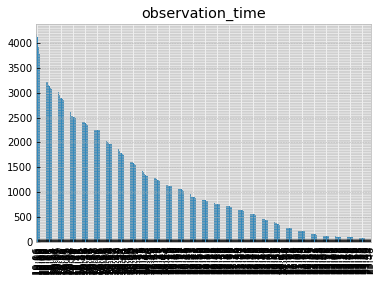

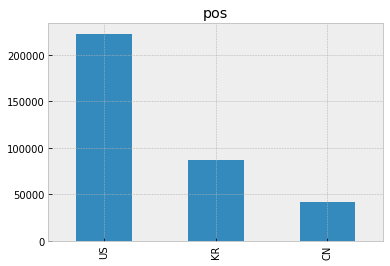

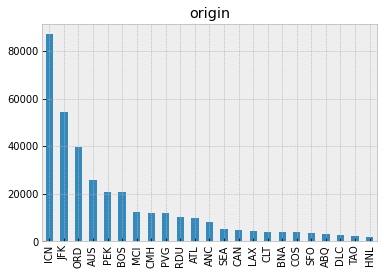

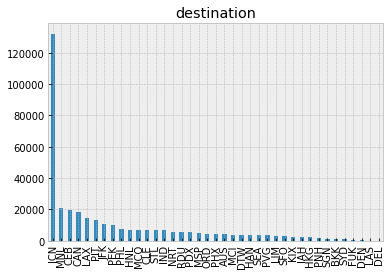

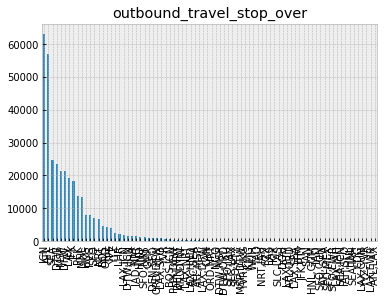

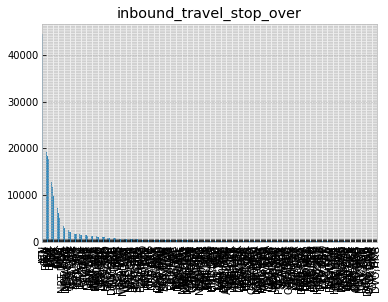

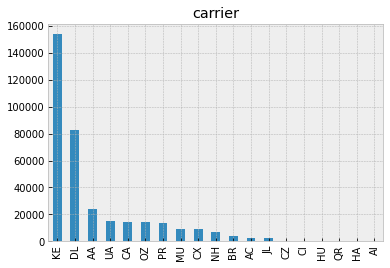

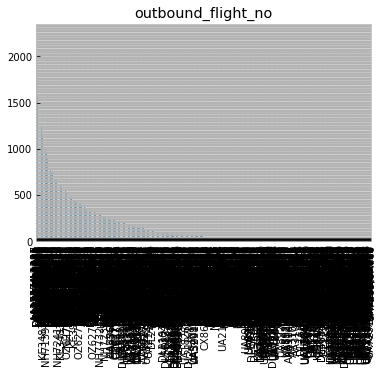

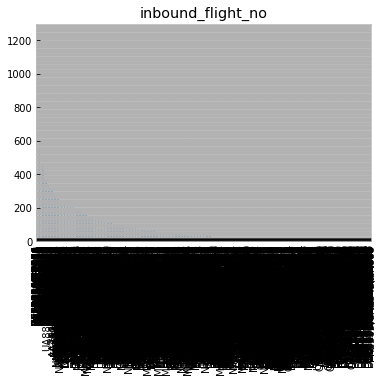

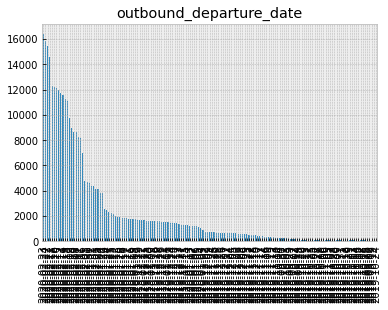

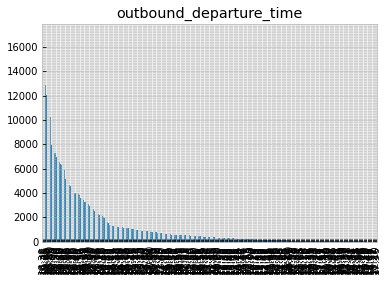

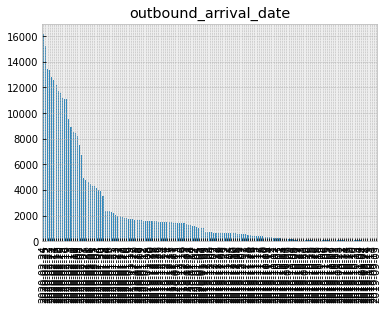

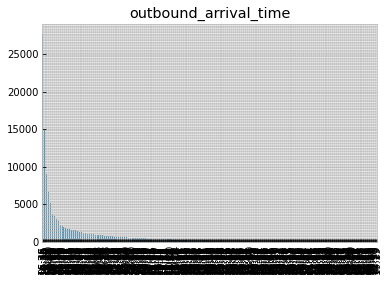

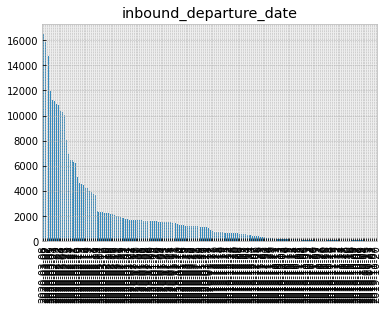

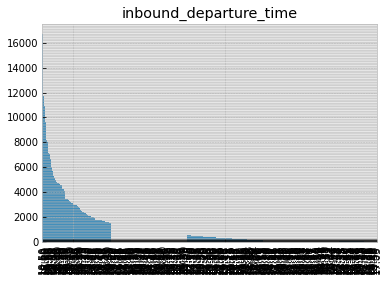

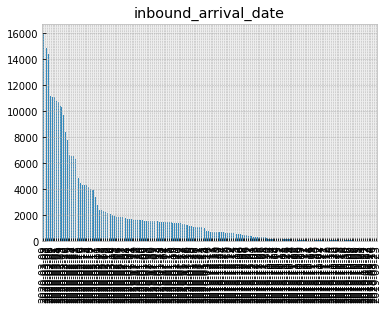

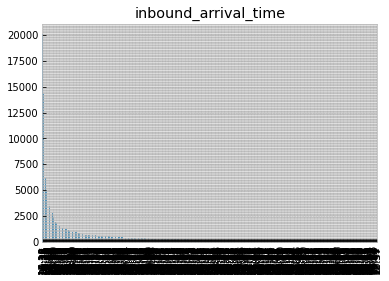

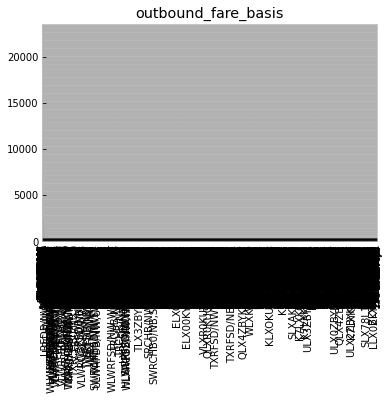

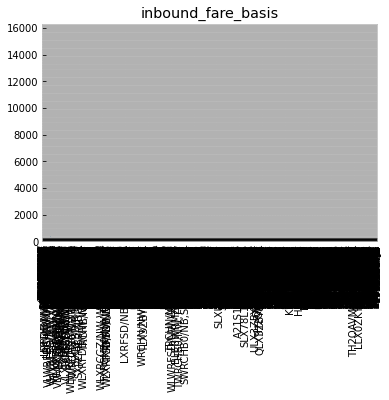

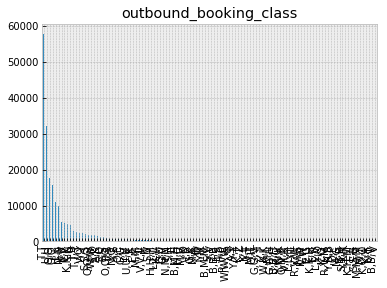

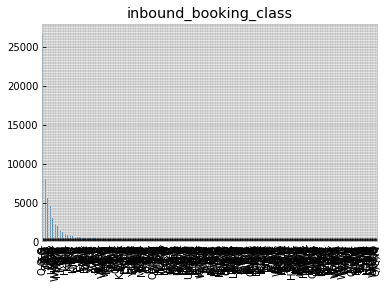

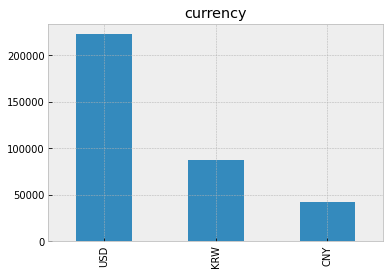

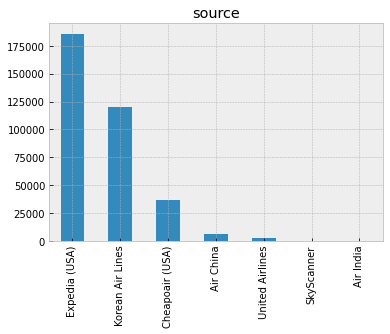

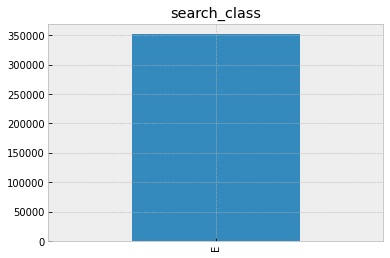

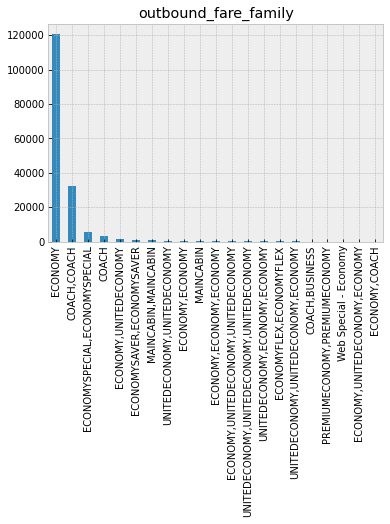

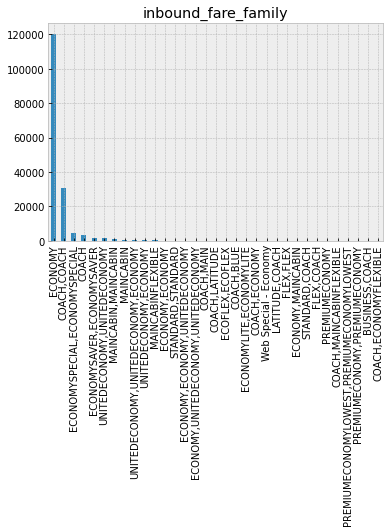

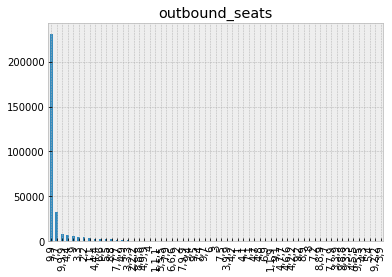

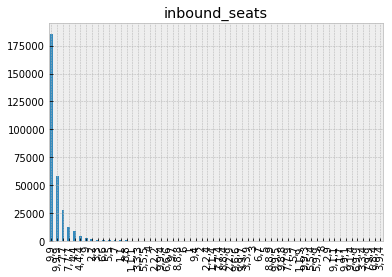

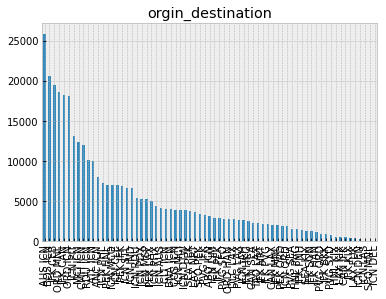

In [20]:
for col in category_feature: 
    df_all[col].value_counts().plot(kind='bar') 
    plt.title(col) 
    plt.show()

In [41]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
for col in category_feature: 
    colname = col + "_label"
    #print(colname)
    df_all[colname] = labelencoder.fit_transform(df_all[col].astype(str))

In [43]:
df_all.corr()

,id,is_one_way,price_exc,price_inc,tax,price_outbound,price_inbound,is_tax_inc_outin,min_stay,outbound_flight_duration,inbound_flight_duration,price_inc_minmax,observation_date_label,observation_time_label,pos_label,origin_label,destination_label,outbound_travel_stop_over_label,inbound_travel_stop_over_label,carrier_label,outbound_flight_no_label,inbound_flight_no_label,outbound_departure_date_label,outbound_departure_time_label,outbound_arrival_date_label,outbound_arrival_time_label,inbound_departure_date_label,inbound_departure_time_label,inbound_arrival_date_label,inbound_arrival_time_label,outbound_fare_basis_label,inbound_fare_basis_label,outbound_booking_class_label,inbound_booking_class_label,currency_label,source_label,search_class_label,outbound_fare_family_label,inbound_fare_family_label,outbound_seats_label,inbound_seats_label,orgin_destination_label
id,1.000000,NaN,0.073333,0.368486,0.134134,0.448620,0.346735,NaN,-0.069863,-0.070160,-0.139359,0.368486,NaN,0.993159,-0.354735,0.165629,0.285445,0.013754,-0.100177,0.208243,0.176144,-0.030598,-0.104292,0.245995,-0.112052,0.044074,-0.111237,-0.200441,-0.104968,-0.115228,-0.491031,-0.497065,0.414434,0.426251,-0.354735,0.142295,NaN,-0.551624,-0.543614,0.140592,0.043671,0.089196
is_one_way,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price_exc,0.073333,NaN,1.000000,0.999187,0.914685,0.979427,0.977668,NaN,-0.308722,-0.458330,-0.416696,0.999187,NaN,0.044142,0.044306,-0.504323,0.094741,-0.277244,-0.213789,0.162265,-0.100127,-0.256016,-0.019310,0.292175,-0.030520,0.286246,-0.047750,-0.307610,-0.046268,0.095784,-0.462419,-0.462785,0.070263,0.021064,0.044306,0.548422,NaN,-0.035713,0.304774,-0.282620,-0.361580,-0.610871
price_inc,0.368486,NaN,0.999187,1.000000,0.930232,0.979427,0.977668,NaN,-0.215611,-0.322212,-0.342400,1.000000,NaN,0.358372,-0.401343,0.046727,0.350069,-0.158140,-0.230556,0.258628,0.135254,-0.141692,-0.347315,0.387281,-0.359704,0.182508,-0.366966,-0.364095,-0.361246,-0.046465,-0.692857,-0.692197,0.450794,0.450039,-0.401343,0.591425,NaN,-0.572536,-0.496986,0.007747,-0.127038,-0.132428
tax,0.134134,NaN,0.914685,0.930232,1.000000,NaN,NaN,NaN,-0.338918,-0.529998,-0.497506,0.930232,NaN,0.105527,0.040853,-0.546438,0.095411,-0.294031,-0.228008,0.139956,-0.142270,-0.309859,0.018514,0.315817,0.005725,0.313820,-0.013404,-0.363242,-0.012195,0.103802,-0.636834,-0.635250,0.098969,0.100374,0.040853,0.569971,NaN,-0.061055,0.268555,-0.263705,-0.409127,-0.662402
price_outbound,0.448620,NaN,0.979427,0.979427,NaN,1.000000,0.915145,NaN,NaN,-0.298053,-0.227642,0.979427,NaN,0.480509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.580775,-0.298053,0.580775,-0.298053,0.580775,-0.227642,0.580775,-0.227642,0.277375,-0.915145,0.298945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price_inbound,0.346735,NaN,0.977668,0.977668,NaN,0.915145,1.000000,NaN,NaN,-0.218218,-0.166667,0.977668,NaN,0.375712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.478879,-0.218218,0.478879,-0.218218,0.478879,-0.166667,0.478879,-0.166667,-0.133467,-1.000000,-0.111111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_tax_inc_outin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min_stay,-0.069863,NaN,-0.308722,-0.215611,-0.338918,NaN,NaN,NaN,1.000000,0.144936,0.183176,-0.215611,NaN,-0.073618,0.274567,0.246957,0.101476,0.165291,0.032220,0.082326,0.125284,0.034990,0.129835,-0.141545,0.133592,0.151156,0.263986,0.008713,0.262648,-0.057533,0.173687,0.174585,-0.270010,-0.097759,0.274567,-0.247038,NaN,0.120114,0.080269,-0.008300,-0.089367,0.294876
outbound_flight_duration,-0.070160,NaN,-0.458330,-0.322212,-0.529998,-0.298053,-0.218218,NaN,0.144936,1.000000,0.336025,-0.322212,NaN,-0.062091,-0.008742,0.165577,-0.188280,0.046576,-0.032666,0.126255,0.255313,0.147670,0.032480,-0.039762,0.045156,-0.194098,0.051319,0.027865,0.052470,-0.03

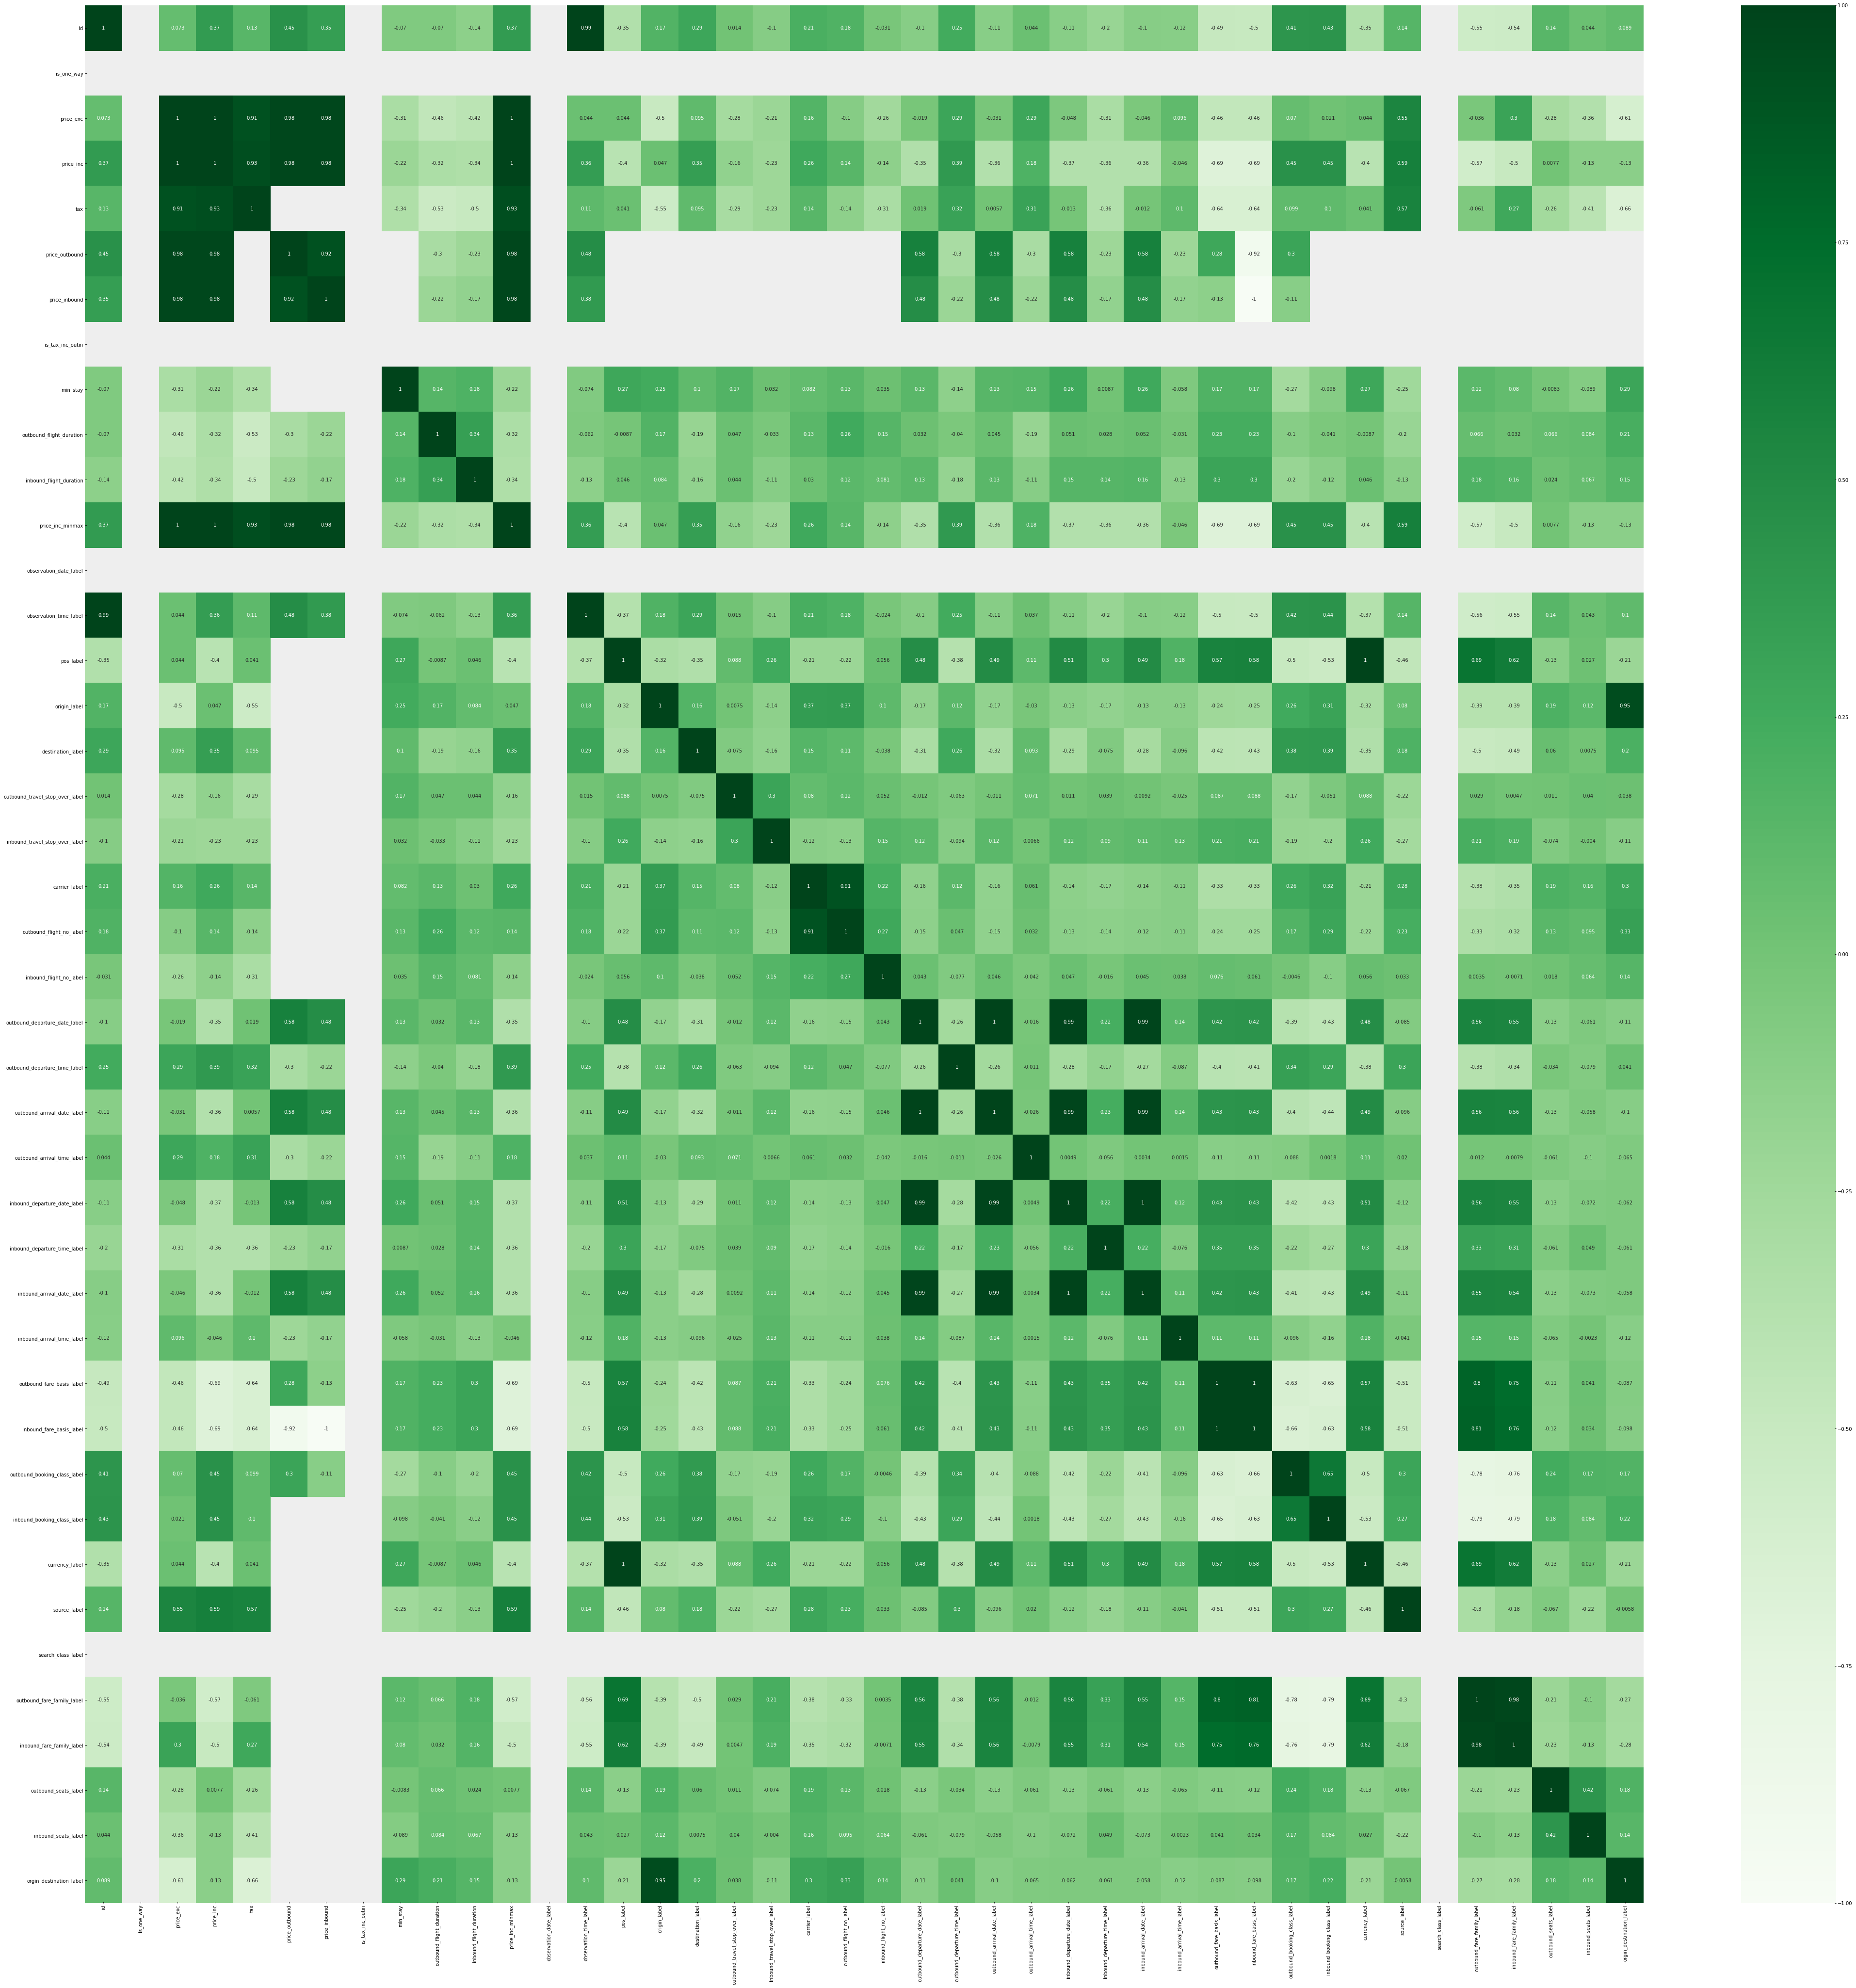

In [46]:
#heatmap으로 상관관계를 표시
import seaborn as sb
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (72,72)
sb.heatmap(df_all.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )